In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report,confusion_matrix, r2_score, accuracy_score, mean_absolute_error

## Classification

In [3]:
df=pd.read_csv('metrics_compact.csv')
df.fillna(value = 0, inplace=True)
#df['rating'].fillna(value = df['rating'].mean(), inplace=True)
final = pd.get_dummies(df, columns=['usergroup'],drop_first=True)
#final['rating_class'] = final['rating'].apply(np.rint)
final['rating']=df['rating'].astype('int32')
final.drop(['chat_id','conv_id'], axis=1, inplace=True)
final.head()

,RR,RD,rating,duration,initiatedByUser,length,turnsByUser,numWords,usergroup_default
0,1.0,9.50,4,23,True,8,3,0.0,1
1,1.0,11.00,5,77,True,8,3,2.0,1
2,1.0,19.67,4,66,False,11,4,0.0,1
3,1.0,164.00,5,844,True,9,4,4.0,1
4,1.0,152.67,4,490,True,11,5,4.0,1


In [4]:
X = final.drop('rating',axis=1)
y = final['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [5]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [6]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        42
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        31
           5       0.53      0.99      0.69       100

   micro avg       0.53      0.53      0.53       189
   macro avg       0.25      0.17      0.12       189
weighted avg       0.50      0.53      0.38       189

[[ 1  0  0  0  0 41]
 [ 0  0  0  0  0  6]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  8]
 [ 0  0  0  0  0 31]
 [ 0  0  0  0  1 99]]
0.5291005291005291


/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)

/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
print(grid.best_params_)
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))
print(accuracy_score(y_test, grid_predictions))

{'C': 100, 'gamma': 0.01}
              precision    recall  f1-score   support

           0       0.90      0.21      0.35        42
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8
           4       0.11      0.03      0.05        31
           5       0.55      0.92      0.69       100

   micro avg       0.54      0.54      0.54       189
   macro avg       0.26      0.19      0.18       189
weighted avg       0.51      0.54      0.45       189

[[ 9  0  0  1  2 30]
 [ 0  0  0  0  0  6]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  8]
 [ 1  0  0  0  1 29]
 [ 0  0  0  3  5 92]]
0.5396825396825397


/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Regression

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
df_reg=pd.read_csv('metrics_compact.csv')
df_reg.fillna(value = 0, inplace=True)
#df_reg['rating'].fillna(df_reg['rating'].mean(), inplace=True)
final_reg = pd.get_dummies(df_reg, columns=['usergroup'],drop_first=True)
final_reg.drop(['chat_id','conv_id'], axis=1, inplace=True)

X_reg = final_reg.drop('rating',axis=1)
y_reg = final_reg['rating']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, 
                                                                    test_size=0.3, random_state=42)

In [33]:
sc = StandardScaler()
X_train_reg = sc.fit_transform(X_train_reg)
X_test_reg = sc.transform(X_test_reg)

/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
regressor = SVR()
regressor.fit(X_train_reg,y_train_reg)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
y_pred_reg = regressor.predict(X_test_reg)
print("RMSE: ",np.sqrt(mean_absolute_error(y_test_reg, y_pred_reg)))
print("R2: ",r2_score(y_test_reg, y_pred_reg, multioutput='variance_weighted'))

RMSE:  0.8136349011239172
R2:  0.6734246269633078


In [36]:
param_grid = {'C': [0.1,1, 10, 100,1000], 
              'gamma':[1, 0.1, 0.01,0.001,0.0001,0.00001, 1e-8],
              'epsilon':[0.1,0.01,0.001]}
grid_reg = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid_reg.fit(X_train_reg,y_train_reg)
grid_predictions_reg = grid_reg.predict(X_test_reg)

/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 105 candidates, totalling 315 fits
[CV] C=0.1, epsilon=0.1, gamma=1 .....................................
[CV] ...................... C=0.1, epsilon=0.1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=1 .....................................
[CV] ...................... C=0.1, epsilon=0.1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=1 .....................................
[CV] ...................... C=0.1, epsilon=0.1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................
[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................
[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................
[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................
[CV] .........

[CV] .................... C=1, epsilon=0.1, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] .................... C=1, epsilon=0.1, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] .................... C=1, epsilon=0.1, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.0001 ..................................
[CV] ................... C=1, epsilon=0.1, gamma=0.0001, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.0001 ..................................
[CV] ................... C=1, epsilon=0.1, gamma=0.0001, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.0001 ..................................
[CV] ................... C=1, epsilon=0.1, gamma=0.0001, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=1e-05 ...................................
[CV] .................... C=1, epsilon=0.1, gamma=1e-05, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=1e-05 ...................................
[CV] .

[CV] .................... C=10, epsilon=0.1, gamma=0.01, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ................... C=10, epsilon=0.1, gamma=0.001, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ................... C=10, epsilon=0.1, gamma=0.001, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ................... C=10, epsilon=0.1, gamma=0.001, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.0001 .................................
[CV] .................. C=10, epsilon=0.1, gamma=0.0001, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.0001 .................................
[CV] .................. C=10, epsilon=0.1, gamma=0.0001, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.0001 .................................
[CV] .................. C=10, epsilon=0.1, gamma=0.0001, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=1e-05 ..................................
[CV] .

[CV] .................... C=100, epsilon=0.1, gamma=0.1, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=0.01 ..................................
[CV] ................... C=100, epsilon=0.1, gamma=0.01, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=0.01 ..................................
[CV] ................... C=100, epsilon=0.1, gamma=0.01, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=0.01 ..................................
[CV] ................... C=100, epsilon=0.1, gamma=0.01, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=0.001 .................................
[CV] .................. C=100, epsilon=0.1, gamma=0.001, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=0.001 .................................
[CV] .................. C=100, epsilon=0.1, gamma=0.001, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=0.001 .................................
[CV] .................. C=100, epsilon=0.1, gamma=0.001, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=0.0001 ................................
[CV] .

[CV] ..................... C=1000, epsilon=0.1, gamma=1, total=   0.2s
[CV] C=1000, epsilon=0.1, gamma=1 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=1, total=   0.2s
[CV] C=1000, epsilon=0.1, gamma=0.1 ..................................
[CV] ................... C=1000, epsilon=0.1, gamma=0.1, total=   0.2s
[CV] C=1000, epsilon=0.1, gamma=0.1 ..................................
[CV] ................... C=1000, epsilon=0.1, gamma=0.1, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=0.1 ..................................
[CV] ................... C=1000, epsilon=0.1, gamma=0.1, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=0.01 .................................
[CV] .................. C=1000, epsilon=0.1, gamma=0.01, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=0.01 .................................
[CV] .................. C=1000, epsilon=0.1, gamma=0.01, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=0.01 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:   10.7s finished
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
print(grid_reg.best_params_)
print("RMSE: ",np.sqrt(mean_absolute_error(y_test_reg, grid_predictions_reg)))
print("R2: ",r2_score(y_test_reg, grid_predictions_reg, multioutput='variance_weighted'))

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
RMSE:  0.7804148374246302
R2:  0.6887309392490875


### Save Model

In [10]:
filename = 'best_svm.sav'

In [25]:
best_regressor= grid_reg
pickle.dump(best_regressor, open(filename, 'wb'))

### Restore Model

In [38]:
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_best = loaded_model.predict(X_test_reg)

print("Best RMSE: ",np.sqrt(mean_absolute_error(y_test_reg, y_pred_best)))
print("Best R2: ",r2_score(y_test_reg, y_pred_best, multioutput='variance_weighted'))

Best RMSE:  0.799009961556252
Best R2:  0.7104264703989049


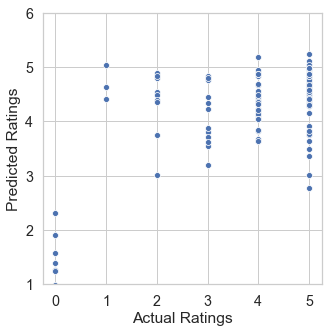

In [40]:
plt.figure(figsize=(5,5))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

svr=sns.scatterplot(x=y_test_reg, y=y_pred_best, palette='viridis')
#svr.set_yticklabels(["1","2","3","4","5"], rotation=45)
plt.ylim(1, 6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
#plt.title("Linear Regression", y=1.025, fontsize = 16, loc='right')

svr_fig = svr.get_figure()
#svr_fig.savefig("../documentation/images/svr.eps", format='eps', bbox_inches='tight')